<a href="https://colab.research.google.com/github/sarimimran/Housing/blob/main/Zameen_property.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
import re
import json
import math
import pprint
import requests
# import pandas_profiling
from scipy.stats import zscore
from collections import defaultdict
from urllib.request import urlopen, Request

import numpy as np
import pandas as pd
# plotting stuff
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
colorMap = sns.light_palette("blue", as_cmap=True)
import missingno as msno
# system
import warnings
warnings.filterwarnings('ignore')
# garbage collector to keep RAM in check
import gc  
import matplotlib.gridspec as gridspec
from datetime import datetime


In [86]:
from google.colab import files 
uploaded=files.upload()

Saving Property.xlsx to Property.xlsx


In [89]:
data = pd.read_excel('Property.xlsx')


In [91]:
data.head(10)

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,Year,Month,agency,agent
0,347795,8,https://www.zameen.com/Property/lahore_model_t...,House,220000000,Model Town,Lahore,Punjab,31.483869,74.325686,0,6 Kanal,For Sale,0,2019-07-17,2019,7,Real Biz International,Usama Khan
1,482892,48,https://www.zameen.com/Property/lahore_multan_...,House,40000000,Multan Road,Lahore,Punjab,31.431593,74.179980,5,1 Kanal,For Sale,5,2018-10-06,2018,10,Khan Estate,mohsinkhan and B
2,555962,75,https://www.zameen.com/Property/eden_eden_aven...,House,9500000,Eden,Lahore,Punjab,31.499348,74.416959,0,9 Marla,For Sale,3,2019-07-03,2019,7,Shahum Estate 2,"Babar Hameed, Raja Omar"
3,562843,3821,https://www.zameen.com/Property/gulberg_2_gulb...,House,125000000,Gulberg,Lahore,Punjab,31.522069,74.355512,7,1 Kanal,For Sale,8,2019-04-04,2019,4,NaN,NaN
4,686990,3522,https://www.zameen.com/Property/allama_iqbal_t...,House,21000000,Allama Iqbal Town,Lahore,Punjab,31.506483,74.286017,5,11 Marla,For Sale,6,2019-04-04,2019,4,NaN,NaN
5,785289,3102,https://www.zameen.com/Property/gulberg_paf_fa...,House,52000000,Gulberg,Lahore,Punjab,31.495909,74.350569,6,1 Kanal,For Sale,5,2019-06-02,2019,6,MATZ Services,Group Captain (R) Tajammul Baig
6,891543,4031,https://www.zameen.com/Property/military_accou...,House,16500000,Military Accounts Housing Society,Lahore,Punjab,31.421229,74.285560,7,8 Marla,For Sale,6,2019-07-03,2019,7,NaN,NaN
7,983065,3749,https://www.zameen.com/Property/eme_society_em...,House,32500000,EME Society,Lahore,Punjab,31.439978,74.209685,0,1 Kanal,For Sale,5,2019-07-03,2019,7,Sukhera Estate & Builders,Ahmed Sheraz Sukhera
8,983066,3745,https://www.zameen.com/Property/eme_society_em...,House,31500000,EME Society,Lahore,Punjab,31.437744,74.213490,0,1 Kanal,For Sale,6,2019-07-03,2019,7,Sukhera Estate & Builders,Ahmed Sheraz Sukhera
9,983075,3931,https://www.zameen.com/Property/izmir_town_izm...,House,40000000,Izmir Town,Lahore,Punjab,31.409106,74.181662,0,1.6 Kanal,For Sale,6,2019-07-03,2019,7,Sukhera Estate & Builders,Ahmed Sheraz Sukhera


In [92]:
z = np.abs(zscore(df['price']))
thresh = 3
outliers_indices = np.where(z > thresh)

In [93]:
print("Number of Outliers:", len(outliers_indices[0]), "with threshold:", thresh)
outliers_data = data.iloc[list(set(outliers_indices[0]))]

Number of Outliers: 4657 with threshold: 3


In [28]:
df.drop(labels=list(set(outliers_indices[0])), inplace=True)

In [95]:
print(df.shape)

(187938, 17)


In [94]:
outliers_data.shape

(4657, 19)

In [96]:
print(df.dtypes)

property_id        int64
location_id        int64
page_url          object
property_type     object
price              int64
location          object
city              object
province_name     object
latitude         float64
longitude        float64
baths              int64
area              object
purpose           object
bedrooms           int64
date_added        object
agency            object
agent             object
dtype: object


In [97]:
def exp_to_float(num):
    s = str(num)
    if s.find("e+") >= 0:
        n, e = s.split('e+')
        n_e = float(n) * (10 ** int(e))
        return n_e
    else:
        return num

In [98]:
def index_to_date(indices):
    labels = []
    for i in range(len(indices.codes[0])):
        label = str(indices.levels[0][indices.codes[0][i]]) + '-' + str(indices.codes[1][i] + 1)
        labels.append(label)
    return labels

In [99]:
def rates_of_change(pivot_table):
    length = len(pivot_table)
    
    # For all Columns
    for column in list(pivot_table.columns):
        
        # Calculating Rates of Change
        rates = [0] * (length - 1)
        for i in range(length - 1):
            rates[i] = round((((pivot_table[column].values[i + 1] - pivot_table[column].values[i]) / pivot_table[column].values[i]) * 100), 2)
            #print(pivot_table.get_value(i,column)
                  
        # Adding Rates of Change to Pivot Table
        pivot_table.insert(pivot_table.columns.get_loc(column) + 1, ('rate_of_change_' + column), ([np.nan] + rates), allow_duplicates=True)
    
    cols = list(pivot_table.columns)
    num_cols = len(cols)
    
    # Plotting the Results
    fig, axs = plt.subplots(num_cols // 2, 2,figsize=(15, int(num_cols * 2.5)))
    x_ticks = index_to_date(pivot_table.index)
    plt.setp(axs, xticks = range(len(x_ticks)), xticklabels = x_ticks)
    
    for i in range(num_cols):
        axs[i // 2, i % 2].plot(pivot_table[str(cols[i])].values, label = str(cols[i]))
        axs[i // 2, i % 2].legend(loc = 0)
        axs[i // 2, i % 2].grid()
        axs[i // 2, i % 2].tick_params(labelrotation=45)
    
    return pivot_table

In [120]:
data.describe().T


,count,mean,std,min,25%,50%,75%,max
property_id,191393.0,1.573170e+07,2.215249e+06,86575.000000,1.511867e+07,1.676385e+07,1.715282e+07,1.769386e+07
location_id,191393.0,4.224580e+03,3.719125e+03,1.000000,1.057000e+03,3.233000e+03,7.182000e+03,1.424600e+04
price,191393.0,1.644655e+07,3.416412e+07,0.000000,8.000000e+04,7.300000e+06,1.800000e+07,2.000000e+09
latitude,191393.0,3.010459e+01,3.645941e+00,11.052446,2.497229e+01,3.146356e+01,3.355087e+01,7.318409e+01
longitude,191393.0,7.157299e+01,3.080463e+00,25.906027,6.715260e+01,7.307774e+01,7.422822e+01,8.016143e+01
baths,191393.0,2.865956e+00,2.435332e+00,0.000000,0.000000e+00,3.000000e+00,4.000000e+00,4.030000e+02
bedrooms,191393.0,3.171516e+00,1.952403e+00,0.000000,2.000000e+00,3.000000e+00,4.000000e+00,6.800000e+01


In [115]:
data['Year'] = pd.to_datetime(data['Year'], infer_datetime_format=True)


In [116]:
data['Month'] = pd.to_datetime(data['Month'], infer_datetime_format=True)


In [131]:
data.reset_index(drop=True, inplace=True)

property_type                                                  Farm House  ...  rate_of_change_Upper Portion
Year                          Month                                        ...                              
1970-01-01 00:00:00.000002018 1970-01-01 00:00:00.000000008  6.650000e+07  ...                           NaN
                              1970-01-01 00:00:00.000000009  9.394500e+07  ...                        182.35
                              1970-01-01 00:00:00.000000010  1.769167e+08  ...                         -9.88
                              1970-01-01 00:00:00.000000011  8.735000e+07  ...                          9.19
                              1970-01-01 00:00:00.000000012  9.757262e+07  ...                        -44.08
1970-01-01 00:00:00.000002019 1970-01-01 00:00:00.000000001  5.451900e+07  ...                        -46.57
                              1970-01-01 00:00:00.000000002  7.378893e+07  ...                          8.37
                              1970-01-01 00:00:00.000000003  9.103595e+07  ...                         34.26
                              1970-01-01 00:00:00.000000004  4.367516e+07  ...                        -27.80
                              1970-01-01 00:00:00.000000005  5.850494e+07  ...                         31.99
                              1970-01-01 00:00:00.000000006  6.251479e+07  ...                         51.16
                              1970-01-01 00:00:00.000000007  3.495223e+07  ...                        -57.18
                              1970-01-01 00:00:00.000000008  6.450000e+07  ...                           NaN

[13 rows x 14 columns]

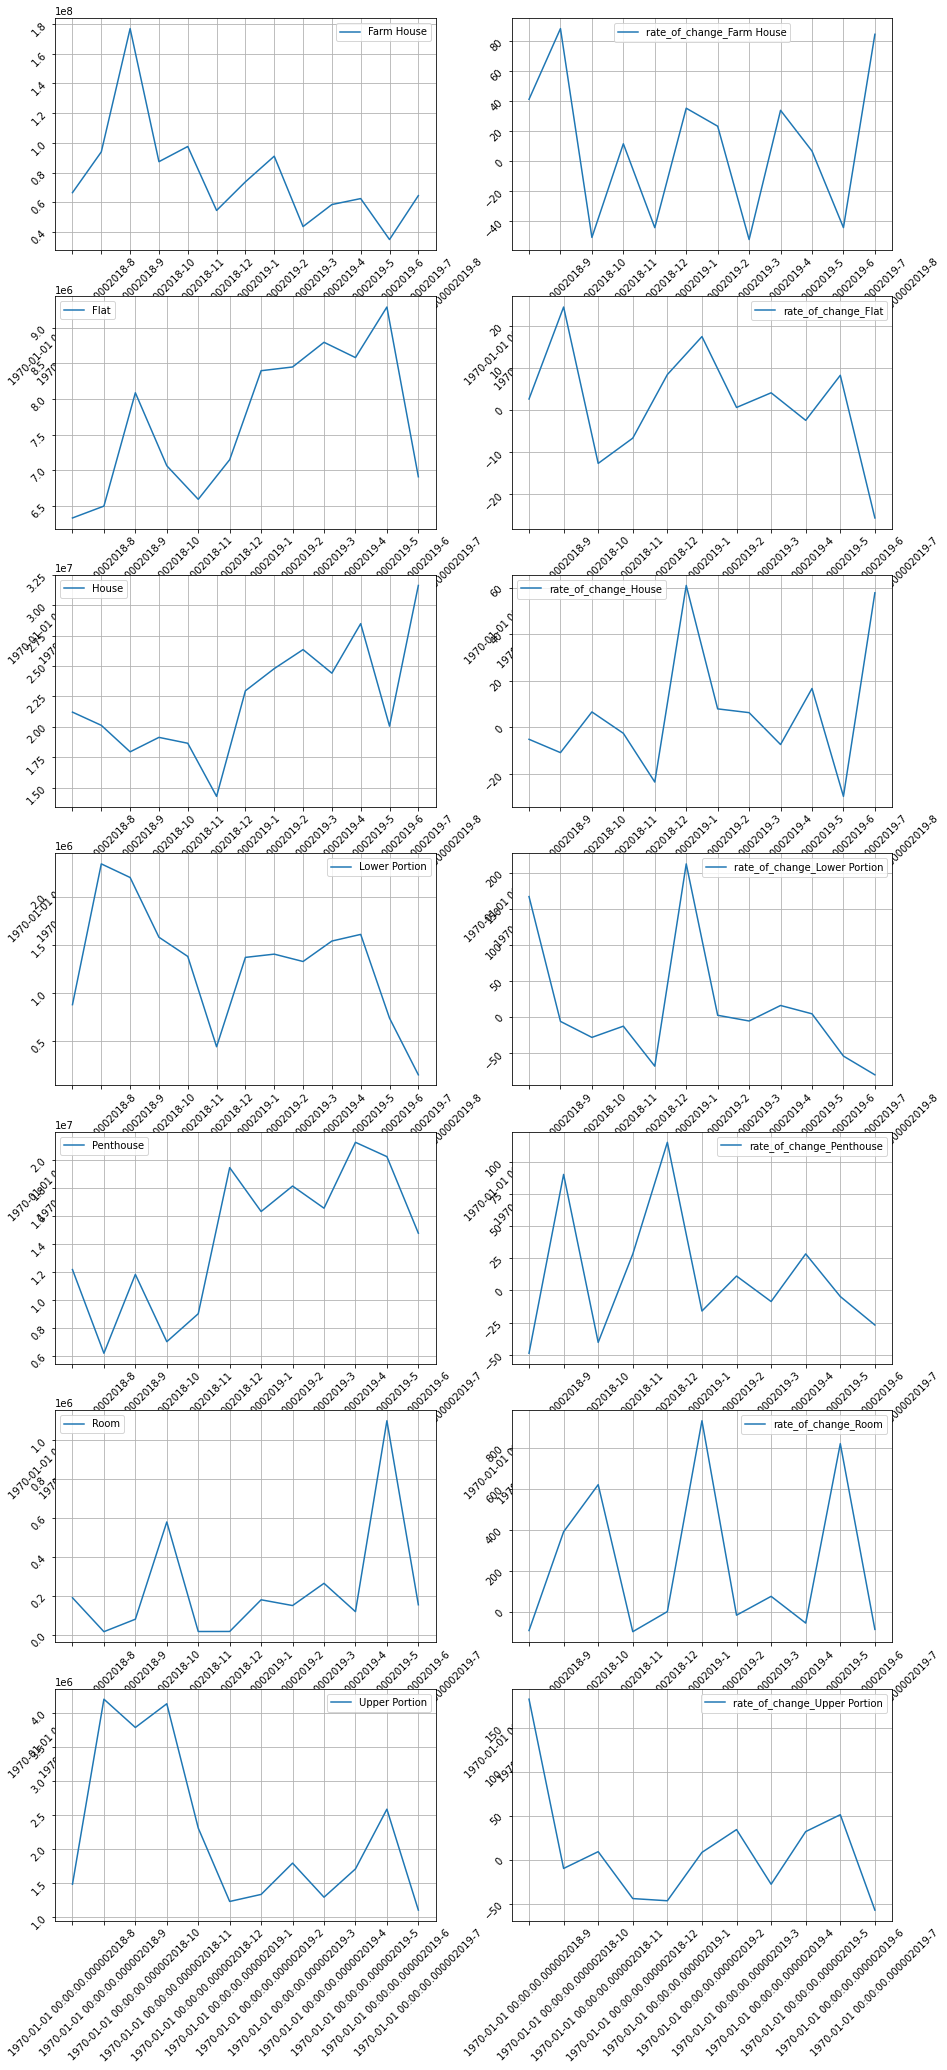

In [133]:
rate_of_change_wrt_type = pd.pivot_table(data, values = 'price', index = ['Year', 'Month'], columns=['property_type'], aggfunc = 'mean')
rates_of_change(rate_of_change_wrt_type)
